In [1]:
import tensorflow as tf

In [2]:
import tensorflow_hub as hub

In [3]:
import pandas as pd
label_csv = pd.read_csv("labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     1a232b490fde0c962aa1fd7f02175e19  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


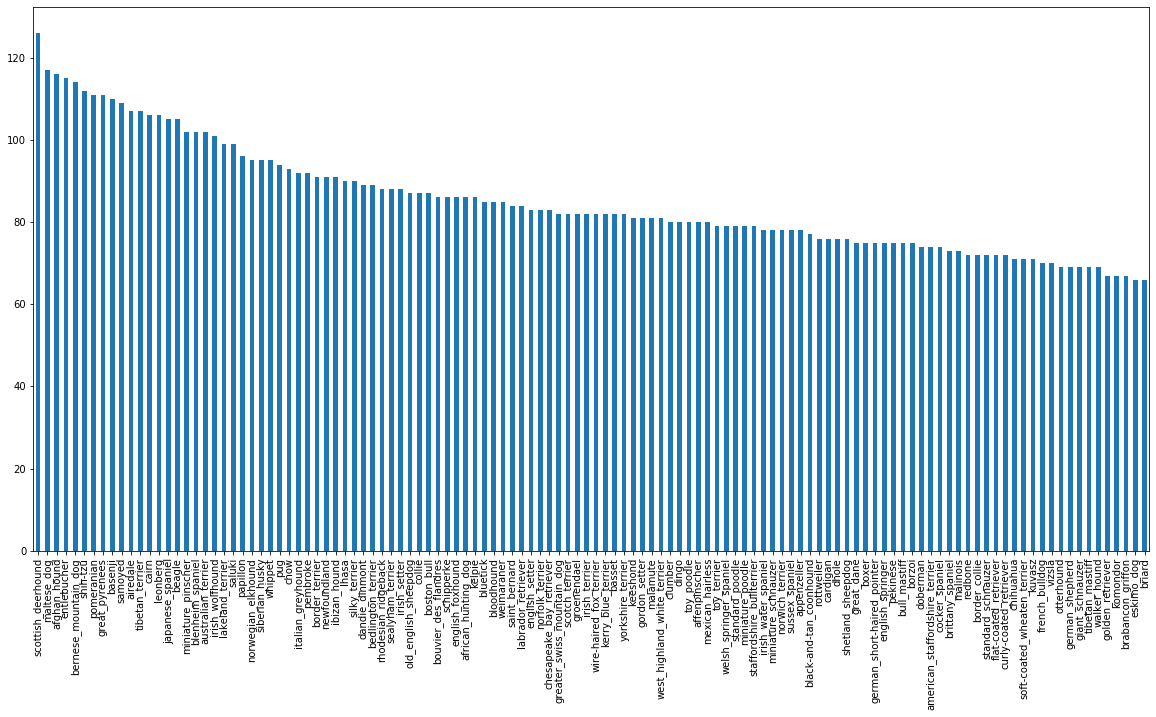

In [5]:
# how many images are there of each bread
label_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [6]:
label_csv["breed"].value_counts().median()

82.0

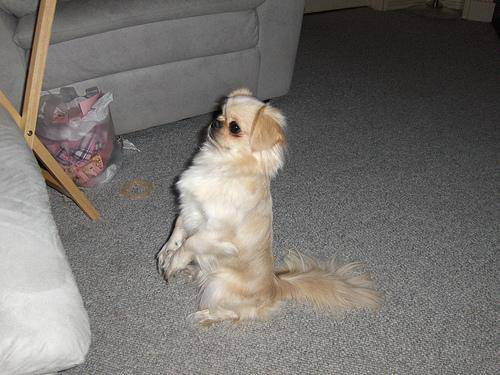

In [7]:
from IPython.display import Image
Image("train/001cdf01b096e06d78e9e5112d419397.jpg")

In [8]:
# Getting image id 
filenames = ["train/" + fname for fname in label_csv["id"] + ".jpg"]

# check first 10
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# check whether no. of filenames matches no. of actual image file
import os
if len(os.listdir("train/")) == len(filenames):
    print("Yes It match")
else:
    print("Not match")

Yes It match


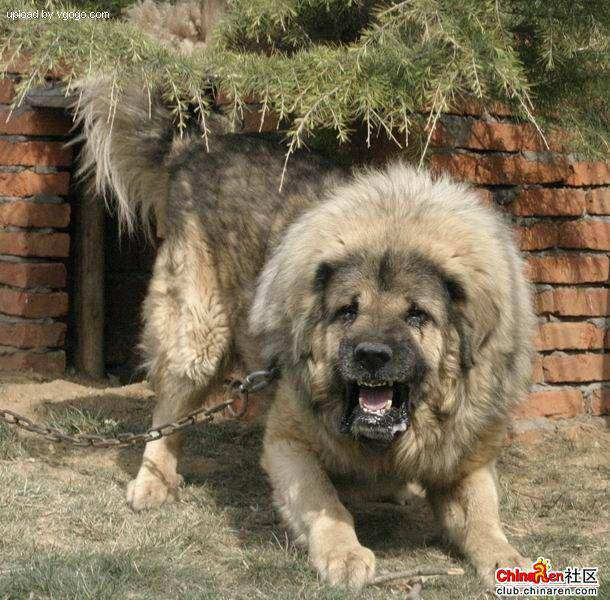

In [10]:
Image(filenames[9000])

In [11]:
label_csv["breed"][9000]

'tibetan_mastiff'

In [12]:
import numpy as np
labels = label_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
# see if no. of labels matches of no. of filenames
if len(labels) == len(filenames):
    print("Yes match")
    
else:
    print("Not match")

Yes match


In [15]:
# find the unique values of an given array
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
# turn a single label into an array an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# turn all
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
len(boolean_labels)

10222

In [19]:
# now convert into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
X = filenames
y = boolean_labels

In [21]:
len(filenames)

10222

In [22]:
NUM_IMAGES = 1000 #param {type:"slider", min:1000, max:1000}

In [23]:
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES],
                                                    test_size = 0.2, random_state = 42)

len(X_train), len(y_train), len(X_val)

(800, 800, 200)

In [24]:
X_train[:5], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

In [25]:
# prepracessing Image(turning image into tensors)

In [26]:
# convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [27]:
image.max(), image.min()

(255, 0)

In [28]:
image.shape

(257, 350, 3)

In [29]:
tf.constant(image).shape

TensorShape([257, 350, 3])

In [30]:
# define image size
IMG_SIZE = 224

# Create of fun for preprocess

def process_image(image_path):
    """
    Takes an image file path and turn the image into a tensor.
    """
    # read in an image file
    image = tf.io.read_file(image_path)
    
    #Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels =3)
    
    # Convert the color channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Resize the image to our desire value (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

# Turns our data into batches

why turn our data into batches?

lets say you're trying to process 10000+ images in one go ... they all might not fit into memory.
so that's why we do about 32(batch size) images at a time

In [31]:
# create asimple function
def get_image_label(image_path, label):
    
    image = process_image(image_path)
    return image, label

In [32]:
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

now we have got a way to turn our data into tuple of tensors in the form: (image, label)

In [33]:
# define the batch size , 32

BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data = False):
    
    # if test data
    if test_data:
        print("creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) 
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # if the data is valid data
    elif valid_data:
        print("creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        
        # suffling for faster function
        data = data.shuffle(buffer_size=len(X))
        
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [34]:
# creating training and validating data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data = True)

creating training data batches...
creating validation data batches...


In [35]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## visualize Data batches

In [36]:
import matplotlib.pyplot as plt

# create a funtion for viewing images in a data batch

def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        
        plt.axis("off")

In [37]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

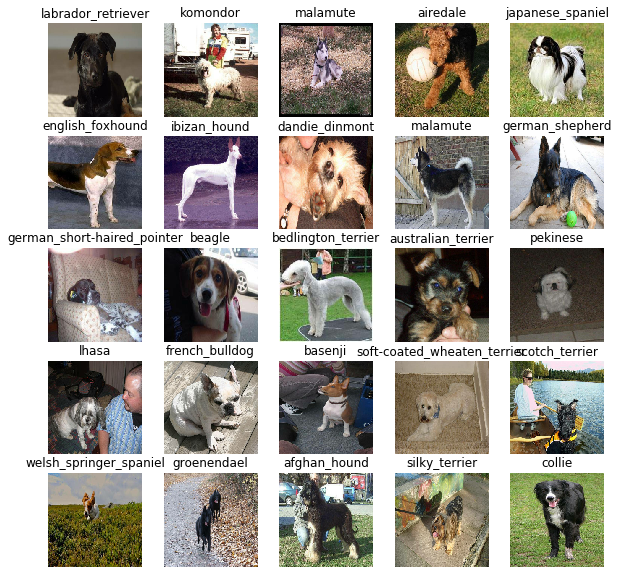

In [38]:
show_25_images(train_images,train_labels)

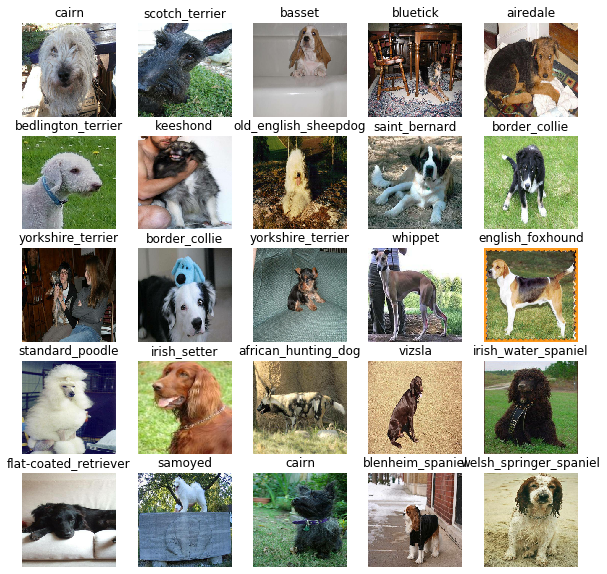

In [39]:
# visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## building a model

before we build a model, there are a few thing we need to define 
* the input shape
* the output shape
* the URL of model we want to use from tensor flow hub resnet v2 50 in architecture

In [40]:
# setup input shape to the model

INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3] # batch , height, width, colour channels

#setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from Tensorflow hub

MODEL_URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4"



In [41]:
# Now we have got our inputs, outputs and model ready to go.
"""
Defines the layers in a keras model in sequential fashion.
compiles the model.
return the model.
"""

def create_model(input_shape=INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
    print("Building model with:", MODEL_URL)
    
# setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # layer 1(input layers) 
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation="softmax") # Layer2 (output Layer)
    ])
    # compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
   
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model


In [42]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  25615849  
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 25,736,089
Trainable params: 120,240
Non-trainable params: 25,615,849
_________________________________________________________________


## Creating callbacks

Callbacks are helper function a model can use during training to do such 
its progress, check its progress or stop training early if a model stop improving.

In [43]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [44]:
import datetime

#create a function to build a tensorBoard callback

def create_tensorboard_callback():
    
    #create a log directory for storing tensorboard logs
    logdir = os.path.join("Dog Vision\logs", 
                         #make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)
    

Early Stopping Callback

In [45]:
# create early atopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)

### Training a model (on subset of data)
our first model is only going to train on 1000 images,to make sure everthing is working.

In [46]:
NUM_EPOCHS = 100

In [47]:
# check to make sure we are still running on gpu
print("GPU", "YESS" if tf.config.list_physical_devices("GPU") else "not available" )

GPU YESS


Let's create function which train a model
* Create a model using 'create model()'
* Setup a tensorBoard callback using 'create_tensorboard_callack()'
* Call the 'fit()' function on our model it the trainig dat, validation data, number of epochs to train for (NUM_EPOCHS) and the callback we like to use
* return the model 

In [48]:
# build a function to train and return a trained model

def train_model():
     
        #Create model 
        model = create_model()
        
        tensorboard = create_tensorboard_callback()
        
        model.fit(x=train_data,
                 epochs=NUM_EPOCHS,
                 validation_data = val_data,
                 validation_freq = 1,
                 callbacks = [tensorboard, early_stopping])
        
        return model

In [49]:
# fit the model to th data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 14s 572ms/step - loss: 5.2174 - accuracy: 0.1075 - val_loss: 3.5475 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 6s 226ms/step - loss: 1.3215 - accuracy: 0.6600 - val_loss: 2.2399 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 6s 226ms/step - loss: 0.4101 - accuracy: 0.9162 - val_loss: 1.9663 - val_accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 6s 228ms/step - loss: 0.1794 - accuracy: 0.9837 - val_loss: 1.8967 - val_accuracy: 0.5250
Epoch 5/100
25/25 [==============================] - 6s 226ms/step - loss: 0.1001 - accuracy: 0.9975 - val_loss: 1.8447 - val_accuracy: 0.5350
Epoch 6/100
25/25 [==============================] - 6s 227ms/step - loss: 0.0690 - accuracy: 1.0000 - val_loss: 1.8424 - val_accuracy: 0.5400
Epoch 7/100
25/

### Checkin tensorboard logs

The tensorboard magic function will access the logs directory we created earlier and visualize its contents

In [50]:
%tensorboard --logdir Dog\ Vision/logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11500.

In [51]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 2s 241ms/step


array([[2.84746941e-03, 5.90946911e-05, 7.68514201e-06, ...,
        4.82371752e-06, 4.63040633e-04, 6.05592853e-04],
       [3.94177696e-05, 1.45023761e-04, 3.51063325e-04, ...,
        7.52808637e-06, 4.04187376e-05, 1.14444686e-06],
       [2.50795068e-07, 9.06550884e-03, 1.44877675e-04, ...,
        3.41756754e-06, 1.85542285e-05, 3.97865697e-05],
       ...,
       [1.10304052e-06, 1.05962445e-05, 5.14908777e-07, ...,
        3.00508077e-07, 5.71275223e-06, 2.09370711e-07],
       [6.60076796e-04, 2.92527352e-06, 7.55882638e-07, ...,
        1.20647167e-06, 1.01066507e-06, 2.24080068e-04],
       [7.64114084e-05, 7.97873440e-07, 1.60847412e-05, ...,
        2.01232513e-04, 1.06810548e-04, 4.73807631e-05]], dtype=float32)

In [52]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [53]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[2.84746941e-03 5.90946911e-05 7.68514201e-06 5.90210184e-05
 7.68775571e-05 1.37844847e-06 1.64859481e-02 2.49424756e-05
 1.33603608e-05 6.10003326e-07 1.21644698e-04 1.65080030e-06
 5.17706803e-06 1.00798866e-06 2.11164243e-05 3.84270315e-05
 9.59531753e-05 1.55631942e-03 3.92370475e-06 1.04087860e-06
 1.31263502e-03 5.60170292e-06 3.11926073e-07 1.89549066e-02
 5.03281535e-06 5.31864644e-05 5.15888222e-02 4.08308842e-04
 1.99501642e-06 5.17106018e-05 4.85611708e-05 3.12363991e-04
 5.53733553e-05 1.13524575e-05 4.50345169e-06 1.53493946e-02
 6.79267430e-07 1.29434538e-05 7.20119004e-08 8.73346216e-05
 2.75551458e-04 1.95677174e-07 1.00456171e-04 4.21495388e-05
 4.90190723e-05 2.20081740e-04 1.08652848e-05 1.36910319e-06
 2.16114655e-04 1.74319775e-05 3.76017374e-06 8.60493572e-07
 1.44960929e-03 8.51870027e-06 9.68688473e-05 1.38120129e-04
 2.97799124e-06 2.71766493e-03 3.31103802e-05 6.75951317e-03
 4.65483572e-05 1.49908747e-05 5.94893718e-05 8.02031900e-06
 1.46286577e-04 2.924624

In [54]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'old_english_sheepdog'

In [55]:

# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [56]:

def plot_pred(prediction_probabilities, labels, images, n=0):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

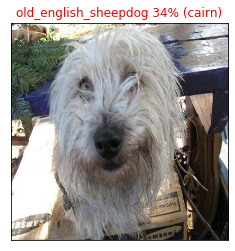

In [57]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [58]:

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

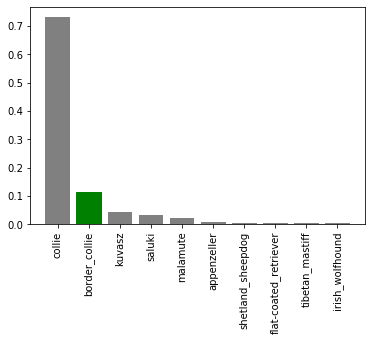

In [59]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

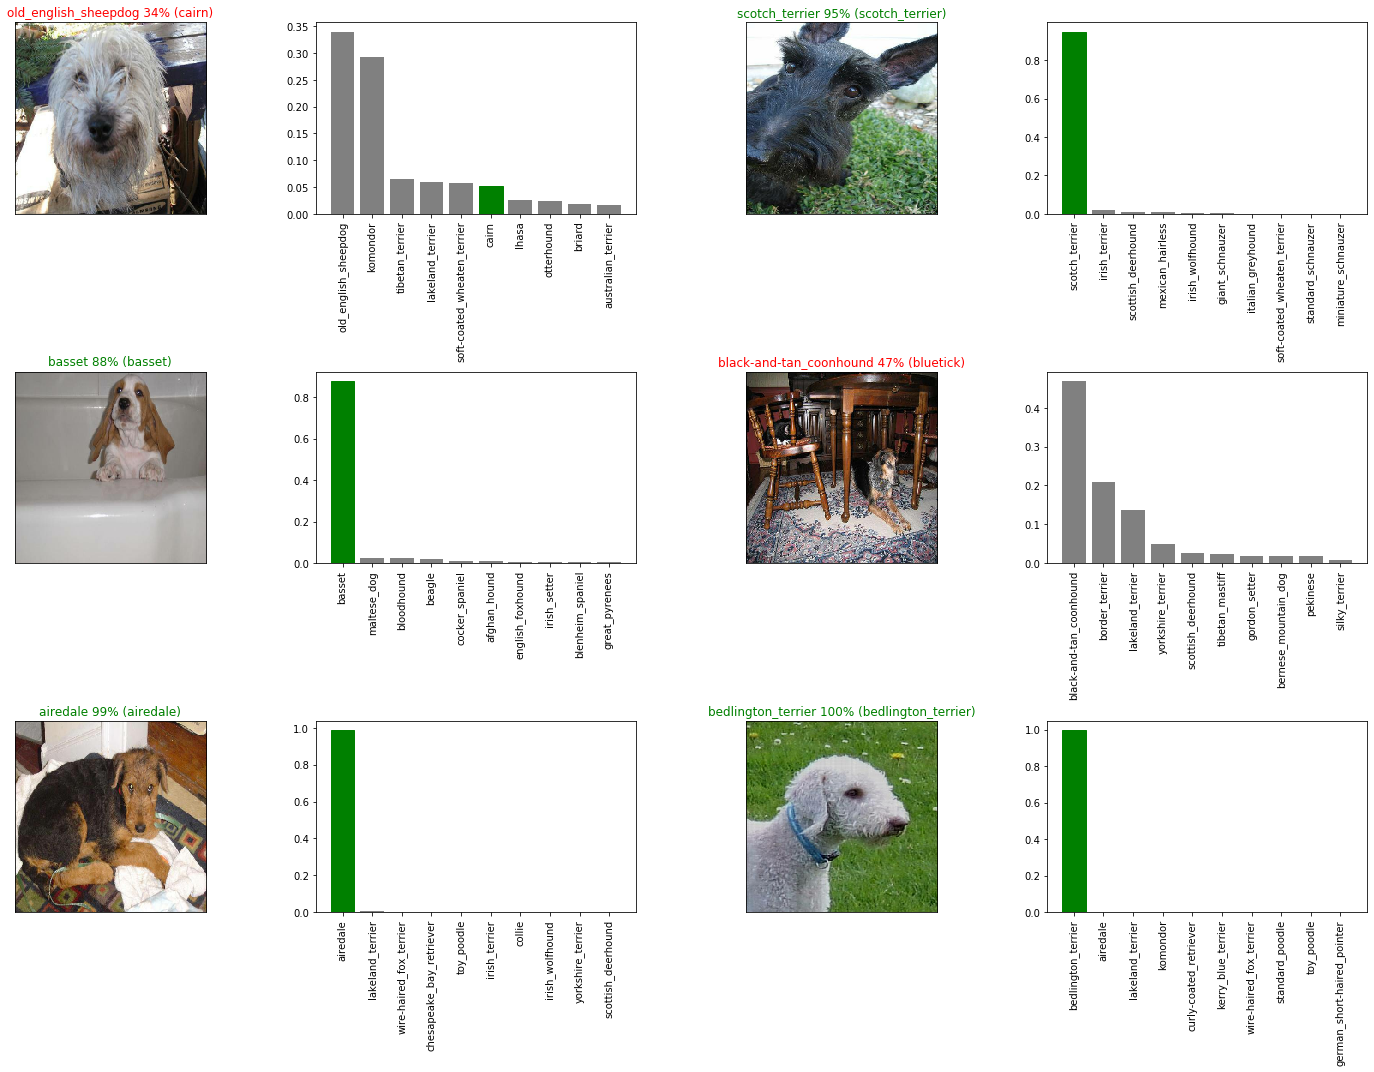

In [60]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [61]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("Dog Vision\models", 
                         #make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [62]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [63]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: Dog Vision\models\20200828-052310-1000-images-Adam.h5...


'Dog Vision\\models\\20200828-052310-1000-images-Adam.h5'

In [64]:
# Load our model trained on 1000 images
model_1000_images = load_model('Dog Vision\\models\\20200419-202436-1000-images-Adam.h5')

Loading saved model from: Dog Vision\models\20200419-202436-1000-images-Adam.h5


In [65]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 178ms/step - loss: 1.7748 - accuracy: 0.5750


[1.774794612612043, 0.575]

In [66]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 2s 264ms/step - loss: 1.6150 - accuracy: 0.6150


[1.614954216139657, 0.615]

In [67]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

In [68]:

# Turn full training data in a data batch
full_data = create_data_batches(X, y)

creating training data batches...


In [69]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4


In [70]:

# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [71]:

# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 81s 252ms/step - loss: 1.7076 - accuracy: 0.5936
Epoch 2/100
320/320 [==============================] - 57s 177ms/step - loss: 0.7093 - accuracy: 0.7886
Epoch 3/100
320/320 [==============================] - 57s 177ms/step - loss: 0.4926 - accuracy: 0.8472
Epoch 4/100
320/320 [==============================] - 57s 178ms/step - loss: 0.3620 - accuracy: 0.8871
Epoch 5/100
320/320 [==============================] - 57s 177ms/step - loss: 0.2644 - accuracy: 0.9171
Epoch 6/100
320/320 [==============================] - 57s 177ms/step - loss: 0.2007 - accuracy: 0.9391
Epoch 7/100
320/320 [==============================] - 57s 177ms/step - loss: 0.1592 - accuracy: 0.9517
Epoch 8/100
320/320 [==============================] - 57s 177ms/step - loss: 0.1395 - accuracy: 0.9541
Epoch 9/100
320/320 [==============================] - 57s 177ms/step - loss: 0.1132 - accuracy: 0.9659
Epoch 10/100
320/320 [======================

In [72]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: Dog Vision\models\20200828-053947-all-images-Adam.h5...


'Dog Vision\\models\\20200828-053947-all-images-Adam.h5'

In [73]:
# Load in the full model
loaded_full_model = load_model('Dog Vision\\models\\20200419-204856-all-images-Adam.h5')

Loading saved model from: Dog Vision\models\20200419-204856-all-images-Adam.h5


In [74]:

# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [75]:
# How many test images are there?
len(test_filenames)

10357

In [76]:

# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

creating test data batches...


In [77]:

# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 75s 233ms/step


In [78]:

# Check out the test predictions
test_predictions[:10]

array([[3.7151426e-13, 8.8402658e-16, 2.3966514e-16, ..., 2.2857797e-20,
        1.3464679e-16, 3.2169422e-13],
       [1.0213638e-11, 7.3014148e-13, 1.0159938e-14, ..., 8.3162203e-14,
        4.4193512e-13, 1.4742759e-13],
       [1.4313229e-13, 6.5360712e-07, 1.9924954e-11, ..., 3.0738127e-11,
        1.1223215e-12, 1.4404738e-12],
       ...,
       [5.2957592e-08, 5.1822546e-09, 1.7356881e-10, ..., 5.1233623e-10,
        1.0605270e-07, 1.1575228e-08],
       [4.4138732e-10, 6.7886141e-10, 5.2069542e-15, ..., 2.8055264e-10,
        1.8459211e-09, 4.5510796e-12],
       [2.1645368e-11, 1.0285158e-12, 5.6208187e-08, ..., 1.1546497e-13,
        4.7223285e-08, 1.1035419e-15]], dtype=float32)

In [79]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [80]:

# Append test image ID's to predictions DataFrame
test_path = "test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,3.71514e-13,8.84027e-16,2.39665e-16,3.98364e-19,9.85107e-20,1.36864e-19,4.31823e-22,9.06981e-17,1.76441e-20,...,6.15549e-15,3.64552e-16,5.65883e-13,1.14132e-18,1.96227e-15,4.49635e-20,1.25801e-18,2.28578e-20,1.34647e-16,3.21694e-13
1,00102ee9d8eb90812350685311fe5890,1.02136e-11,7.30141e-13,1.01599e-14,1.22184e-11,1.54924e-13,1.99799e-10,3.53516e-16,1.17003e-10,2.18001e-15,...,2.54043e-10,2.32988e-11,1.57029e-11,6.72943e-10,5.85997e-10,2.23101e-13,1.73647e-10,8.31622e-14,4.41935e-13,1.47428e-13
2,0012a730dfa437f5f3613fb75efcd4ce,1.43132e-13,6.53607e-07,1.9925e-11,5.40151e-11,9.18544e-17,3.68211e-14,4.22206e-15,4.55589e-16,1.44873e-09,...,8.95208e-12,1.04331e-14,2.67341e-09,8.81169e-09,6.94038e-12,1.33986e-14,4.71848e-13,3.07381e-11,1.12232e-12,1.44047e-12
3,001510bc8570bbeee98c8d80c8a95ec1,2.55569e-06,9.07237e-11,2.60308e-14,1.26722e-11,2.64789e-12,1.45039e-07,1.7919e-11,2.45499e-12,1.08897e-05,...,6.27479e-10,3.55947e-14,3.21312e-07,1.93566e-08,1.21931e-08,2.47984e-11,4.3007e-12,6.96465e-09,2.77219e-14,1.00601e-09
4,001a5f3114548acdefa3d4da05474c2e,2.85572e-05,6.17277e-11,3.38295e-11,3.72687e-17,5.70758e-19,3.50222e-11,7.40799e-14,1.35918e-12,8.26644e-16,...,8.10015e-10,2.81231e-13,2.61426e-12,5.60028e-13,2.04969e-15,9.78894e-12,2.11655e-14,5.59346e-13,2.56079e-13,2.08324e-13


In [82]:
preds_df.to_csv("full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [86]:
# Get custom image filepaths
custom_path = "dog/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [87]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

creating test data batches...


In [88]:

# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [89]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['airedale', 'border_collie']

In [90]:

# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

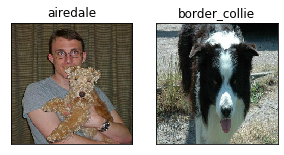

In [91]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)